# Detection of Fake / Real Profiles 

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import pandas_profiling as pp
import keras as k
import gender_guesser.detector as gender

Using TensorFlow backend.


In [2]:
from sklearn.model_selection import train_test_split

In [38]:
df_users = pd.read_csv("dataset/data/users.csv")
df_fusers = pd.read_csv("dataset/data/fusers.csv")

In [39]:
df_fusers.shape

(1337, 34)

In [40]:
df_users.shape

(1481, 34)

In [41]:
#for df_fusers
isFake = np.zeros(1337)

#for df_users
isNotFake = np.ones(1481)

In [42]:
#adding is fake or not column to make predictions for it
df_fusers["isFake"] = isFake
df_users["isFake"] = isNotFake


In [43]:
df_allUsers = pd.concat([df_fusers, df_users], ignore_index=True)
df_allUsers.columns = df_allUsers.columns.str.strip()

In [44]:
#to shuffle the whole data
df_allUsers = df_allUsers.sample(frac=1).reset_index(drop=True)

In [45]:
df_allUsers.describe()

id  statuses_count  followers_count  friends_count  \
count  2.818000e+03     2818.000000      2818.000000    2818.000000   
mean   5.374889e+08     1672.198368       371.105039     395.363023   
std    2.977005e+08     4884.669157      8022.631339     465.694322   
min    3.610511e+06        0.000000         0.000000       0.000000   
25%    3.620867e+08       35.000000        17.000000     168.000000   
50%    6.162253e+08       77.000000        26.000000     306.000000   
75%    6.177673e+08     1087.750000       111.000000     519.000000   
max    1.391998e+09    79876.000000    408372.000000   12773.000000   

       favourites_count  listed_count  default_profile  default_profile_image  \
count       2818.000000   2818.000000           1728.0                    8.0   
mean         234.541164      2.818666              1.0                    1.0   
std         1445.847248     23.480430              0.0                    0.0   
min            0.000000      0.000000              1.0                    1.0   
25%            0.000000      0.000000              1.0                    1.0   
50%            0.000000      0.000000              1.0                    1.0   
75%           37.000000      1.000000              1.0                    1.0   
max        44349.000000    744.000000              1.0                    1.0   

       geo_enabled  profile_use_background_image  profile_background_tile  \
count        721.0                        2760.0                    489.0   
mean           1.0                           1.0                      1.0   
std            0.0                           0.0                      0.0   
min            1.0                           1.0                      1.0   
25%            1.0                           1.0                      1.0   
50%            1.0                           1.0                      1.0   
75%            1.0                           1.0                      1.0   
max            1.0                           1.0                      1.0   

         utc_offset  protected  verified       isFake  
count   1069.000000        0.0       0.0  2818.000000  
mean    1478.391020        NaN       NaN     0.525550  
std     8108.211889        NaN       NaN     0.499435  
min   -39600.000000        NaN       NaN     0.000000  
25%     3600.000000        NaN       NaN     0.000000  
50%     3600.000000        NaN       NaN     1.000000  
75%     3600.000000        NaN       NaN     1.000000  
max    36000.000000        NaN       NaN     1.000000

In [46]:
df_allUsers.head()

id                name    screen_name  statuses_count  \
0  1137300811               L'Ale       LaleCara             134   
1   586584556  Francesco Esposito  FranKsBigBand              83   
2   616206563       Izola Tillman      izolaywwf              70   
3   477006767      Grazia Scuderi  GraziaScuderi             540   
4  1219743308      Chiara Di Luca  kozmic_dancer              79   

   followers_count  friends_count  favourites_count  listed_count  \
0               34             97                21             0   
1               34            133                 5             0   
2               22            621                 0             0   
3               35             89                51             0   
4               16             75                10             0   

                       created_at                                    url  ...  \
0  Thu Jan 31 16:04:35 +0000 2013                                    NaN  ...   
1  Mon May 21 14:22:10 +0000 2012  http://www.facebook.com/FranKsbigband  ...   
2  Sat Jun 23 15:33:16 +0000 2012                                    NaN  ...   
3  Sat Jan 28 18:46:22 +0000 2012                                    NaN  ...   
4  Mon Feb 25 20:37:51 +0000 2013                                    NaN  ...   

                        profile_background_image_url profile_background_color  \
0  http://a0.twimg.com/profile_background_images/...                   C0DEED   
1    http://a0.twimg.com/images/themes/theme1/bg.png                   C0DEED   
2    http://a0.twimg.com/images/themes/theme1/bg.png                   C0DEED   
3  http://a0.twimg.com/profile_background_images/...                   EBE5C1   
4  http://a0.twimg.com/profile_background_images/...                   FFF04D   

  profile_link_color  utc_offset  protected  verified  \
0             0084B4         NaN        NaN       NaN   
1             0084B4      7200.0        NaN       NaN   
2             0084B4         NaN        NaN       NaN   
3             B32A00      7200.0        NaN       NaN   
4             121CE0         NaN        NaN       NaN   

                                         description              updated  \
0  L'unico tiranno che accetto in questo mondo è ...  2015-02-14 10:54:49   
1                               'Nu Buono Guaglione.  2015-02-14 10:54:49   
2                                                NaN  2015-02-14 10:40:01   
3  E poi ci sono quei momenti in cui il cuore bat...  2015-02-14 10:54:49   
4                 E non ci siamo persi niente finora  2015-02-14 10:54:49   

   dataset isFake  
0      E13    1.0  
1      E13    1.0  
2      INT    0.0  
3      E13    1.0  
4      E13    1.0  

[5 rows x 35 columns]

In [47]:
Y = df_allUsers.isFake

In [48]:
df_allUsers.drop(["isFake"], axis=1, inplace=True)
X = df_allUsers

In [49]:
pp.ProfileReport(X)

In [50]:
Y.reset_index(drop=True, inplace=True)

In [51]:
print(Y.shape)

(2818,)


In [52]:
X.head()

id                name    screen_name  statuses_count  \
0  1137300811               L'Ale       LaleCara             134   
1   586584556  Francesco Esposito  FranKsBigBand              83   
2   616206563       Izola Tillman      izolaywwf              70   
3   477006767      Grazia Scuderi  GraziaScuderi             540   
4  1219743308      Chiara Di Luca  kozmic_dancer              79   

   followers_count  friends_count  favourites_count  listed_count  \
0               34             97                21             0   
1               34            133                 5             0   
2               22            621                 0             0   
3               35             89                51             0   
4               16             75                10             0   

                       created_at                                    url  ...  \
0  Thu Jan 31 16:04:35 +0000 2013                                    NaN  ...   
1  Mon May 21 14:22:10 +0000 2012  http://www.facebook.com/FranKsbigband  ...   
2  Sat Jun 23 15:33:16 +0000 2012                                    NaN  ...   
3  Sat Jan 28 18:46:22 +0000 2012                                    NaN  ...   
4  Mon Feb 25 20:37:51 +0000 2013                                    NaN  ...   

  profile_sidebar_fill_color  \
0                     DDEEF6   
1                     DDEEF6   
2                     DDEEF6   
3                     DDEEF6   
4                     F6FFD1   

                        profile_background_image_url profile_background_color  \
0  http://a0.twimg.com/profile_background_images/...                   C0DEED   
1    http://a0.twimg.com/images/themes/theme1/bg.png                   C0DEED   
2    http://a0.twimg.com/images/themes/theme1/bg.png                   C0DEED   
3  http://a0.twimg.com/profile_background_images/...                   EBE5C1   
4  http://a0.twimg.com/profile_background_images/...                   FFF04D   

   profile_link_color  utc_offset  protected verified  \
0              0084B4         NaN        NaN      NaN   
1              0084B4      7200.0        NaN      NaN   
2              0084B4         NaN        NaN      NaN   
3              B32A00      7200.0        NaN      NaN   
4              121CE0         NaN        NaN      NaN   

                                         description              updated  \
0  L'unico tiranno che accetto in questo mondo è ...  2015-02-14 10:54:49   
1                               'Nu Buono Guaglione.  2015-02-14 10:54:49   
2                                                NaN  2015-02-14 10:40:01   
3  E poi ci sono quei momenti in cui il cuore bat...  2015-02-14 10:54:49   
4                 E non ci siamo persi niente finora  2015-02-14 10:54:49   

  dataset  
0     E13  
1     E13  
2     INT  
3     E13  
4     E13  

[5 rows x 34 columns]

In [53]:
lang_list = list(enumerate(np.unique(X["lang"])))
lang_dict = {name : i for i, name in lang_list}
X.loc[:, "lang_num"] = X["lang"].map(lambda x: lang_dict[x]).astype(int)

X.drop(["name"], axis=1, inplace=True)

In [54]:
X = X[[
    "statuses_count",
    "followers_count",
    "friends_count",
    "favourites_count",
    "lang_num",
    "listed_count",
    "geo_enabled",
    "utc_offset",
    "profile_use_background_image"
                        ]]

In [55]:
pp.ProfileReport(X)

In [56]:
X = X.replace(np.nan, 0) #To replace the missing boolean values with zeros as it means false

In [57]:
pp.ProfileReport(X)

In [58]:
train_X, val_X, train_y, val_y = train_test_split(X, Y, train_size=0.8, test_size=0.2, random_state=0)

In [59]:
print(train_X.shape)
print(val_X.shape)
print(train_y.shape)
print(val_y.shape)

(2254, 9)
(564, 9)
(2254,)
(564,)


In [81]:
from numpy.random import seed
seed(1)

In [82]:
import keras
from keras import regularizers
from keras.models import Sequential
from keras.layers import Dense, Dropout, Activation
from keras import optimizers

Epoch 1/8
2254/2254 [==============================] - 0s 75us/step - loss: 308.8706 - accuracy: 0.8336
Epoch 2/8
2254/2254 [==============================] - 0s 37us/step - loss: 17.8232 - accuracy: 0.8177
Epoch 3/8
2254/2254 [==============================] - 0s 42us/step - loss: 2.8663 - accuracy: 0.9685
Epoch 4/8
2254/2254 [==============================] - 0s 40us/step - loss: 1.3577 - accuracy: 0.9694
Epoch 5/8
2254/2254 [==============================] - 0s 44us/step - loss: 0.9866 - accuracy: 0.9610
Epoch 6/8
2254/2254 [==============================] - 0s 43us/step - loss: 0.8056 - accuracy: 0.9530
Epoch 7/8
2254/2254 [==============================] - 0s 35us/step - loss: 0.8387 - accuracy: 0.9765
Epoch 8/8
2254/2254 [==============================] - 0s 38us/step - loss: 0.7520 - accuracy: 0.9809


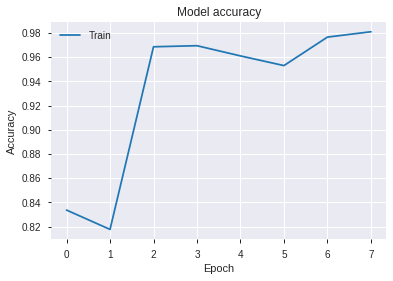

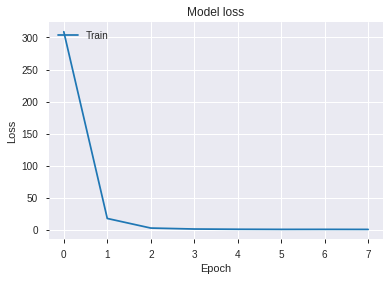

In [160]:
model = Sequential()
model.add(Dense(32, activation='relu', input_dim=9))
model.add(Dense(64, input_dim=32,
                kernel_regularizer=regularizers.l2(0.0076),
                activity_regularizer=regularizers.l1(0.0023), activation='relu'))
model.add(Dense(1, activation='sigmoid'))
model.compile(optimizer='rmsprop',
              loss='binary_crossentropy',
              metrics=['accuracy'])

history = model.fit(train_X, train_y, epochs=8)

# Plot training & validation accuracy values
plt.plot(history.history['accuracy'])
plt.title('Model accuracy')
plt.ylabel('Accuracy')
plt.xlabel('Epoch')
plt.legend(['Train', 'Test'], loc='upper left')
plt.show()

# Plot training & validation loss values
plt.plot(history.history['loss'])
plt.title('Model loss')
plt.ylabel('Loss')
plt.xlabel('Epoch')
plt.legend(['Train', 'Test'], loc='upper left')
plt.show()


In [161]:
score, acc = model.evaluate(val_X, val_y)
print(acc*100)

564/564 [==============================] - 0s 63us/step
98.58155846595764
